<center><h1>Ayudantía 6</h1></center>
<hr style="color=skyblue; border-color:skyblue"/>
<div style="display:inline-block;float:left"><h3>Profesor: Carlos Alvarado</h3></div>
<div style="display:inline-block;float:right"><h3>Ayudante: Pablo González</h3></div>


<table style="width:90%; font-size:18px; float:left;color:#333;">
  <tr style="background:#90ffc8">
    <th style="text-align:left">Actividad</th>
    <th style="text-align:left">Objetivo</th> 
  </tr>
    
  <tr>
    <td style="text-align:left">Web Scraping II</td>
    <td style="text-align:left"><ul>
        <li>Repaso</li>
        <li>Expresiones regulares</li>
    </ul></td> 
  </tr>
    
   <tr>
    <td style="text-align:left">Panda</td>
    <td style="text-align:left"><ul>
        <li>Data frames</li>
        <li>Visualización de datos</li>
    </ul></td> 
  </tr>
    
   <tr>
    <td style="text-align:left">Propuestos</td>
    <td style="text-align:left"><ul>
        <li>Regex</li>
        <li>Pandas</li>
    </ul></td> 
  </tr>
    
   <tr>
    <td style="text-align:left">Cierre</td>
    <td style="text-align:left"><ul>
        <li>Dudas ayudantía</li>
        <li>Dudas tarea</li>
    </ul></td> 
  </tr>
  
</table>

<h3>Web Scraping</h3>
<hr />

#### Repaso:
Como hicimos la ayudantía pasada, probemos esta vez extraer los nombres de las criptomonedas en es.investing.com/cript/.
Para ello, primero debemos importar el sitio web del que queremos extraer información, "arregarlo" y filtrar lo que buscamos según las etiquetas o características del elelmento en el DOM.

In [17]:
import requests
from bs4 import BeautifulSoup

headers = {
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36',
    }
page = requests.get('https://es.investing.com/crypto/',headers=headers)
soup = BeautifulSoup(page.content, 'html.parser')
content = soup.find_all(class_="js-currency-name")

for i in content:
    print(i.get_text())

#print(content)

Bitcoin
Ethereum
Ripple
Bitcoin Cash
EOS
Stellar Lumens
Litecoin
Tether
Cardano
Monero


Esta estrategia nos permite extraer fácilmente datos que están ya categorizados, pero ¿qué hacemos si queremos extraer datos que no lo están? Por ejemplo, supongamos que queremos extraer todos los nombres que hay en un sitio web o archivo de texto. En ese caso nos vendría bien buscar algun caracter o combinación de ellos que nos permita filtrar la información. A esto se le denomina "expresiones regulares".

#### Expresiones Regulares:
Para practicar recomiendo utilizar [este sitio web](https://regexr.com/) 

In [169]:
import re
import pandas as pd

content = soup.find('tbody').text
nombre = re.compile(r'(?:\b(\w+)\s+\1\b)|(^[A-Z].+[^A-Z]$)', flags = re.M)
nombres = nombre.findall(content)
nombres = [item for sublist in nombres for item in sublist if item != '']

valor = re.compile(r'^([0-9].+[^$%]$)', flags = re.M)
valores = valor.findall(content)
valores = [re.sub(r'[\.]', r'', x) for x in valores]
valores = [re.sub(r',', r'.', x) for x in valores]
valores = list(map(float, valores))

          Nombres     Valores
0         Bitcoin  6416.90000
1        Ethereum   209.13000
2          Ripple     0.36886
3    Bitcoin Cash   427.19000
4             EOS     5.26220
5  Stellar Lumens     0.21290
6        Litecoin    54.21600
7          Tether     0.99963
8         Cardano     0.07426
9          Monero   112.31000


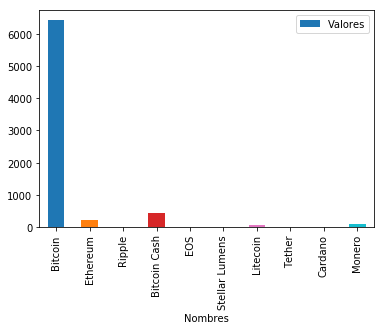

In [182]:
d = {'Nombres': nombres, 'Valores': valores}
df = pd.DataFrame(data=d)
print(df)
df.plot(kind='bar', x = "Nombres", y = "Valores")

#### Ejercicio 1:
A partir del texto entregado, separe primero las direccioens de correo y posteriormente las IDs de estos utilizando expresiones regulares.

In [216]:
texto = '''
Juan: juanarias@gmail.com
Pedro: pedro007@yahoo.com
Pablo: pagonzalez20@uc.cl
Nicolás: nico@uc.cl'''

['juanarias@gmail.com', 'pedro007@yahoo.com', 'pagonzalez20@uc.cl', 'nico@uc.cl'] 
 ['juanarias', 'pedro007', 'pagonzalez20', 'nico']


<h3>Pandas</h3>
<hr />

In [86]:
import pandas as pd
df = pd.read_stata('pokemon.dta') #Lee un archivo csv como dataframe

Exploremos la base de datos:

In [87]:
columnas = [n for n in df.columns] #Obtenemos el nombre de las columnas.
head = df.head()
head_personalizada = df[['Nombre','HP', 'Ataque','Defensa','Legendario']].head()
describir = df.describe()
tail = df.tail()
describir #Prueba imprimir las variables creadas.

,Numero,HP,Ataque,Defensa,AtaqueSP,DefensaSP,Velocidad,Generacion
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,404.000000,68.745973,76.245353,71.385378,69.654275,69.710037,65.863693,3.714994
std,233.105126,26.492635,29.739969,29.572914,29.705931,27.056236,27.783169,1.944148
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,202.500000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,404.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,4.000000
75%,605.500000,80.000000,95.000000,87.500000,90.000000,85.000000,85.000000,5.000000
max,807.000000,255.000000,181.000000,230.000000,173.000000,230.000000,160.000000,7.000000


Esto y más también lo podemos realizar también a través del uso de dataframes.

In [89]:
#df.set_index('Numero', inplace=True) #Notar qué pasa si no hacemos esto.
df.loc[[25,44]]

,Nombre,Tipo1,Tipo2,HP,Ataque,Defensa,AtaqueSP,DefensaSP,Velocidad,Generacion,Legendario
Numero,,,,,,,,,,,
25,Pikachu,Electrico,,35,55,40,50,50,90,1,No
44,Gloom,Planta,Veneno,60,65,70,85,75,40,1,No


In [91]:
#df["Legendario"].value_counts()
df[df.Legendario == 'Si'] #Mismo resultado que df.loc[df['Legendario']=='Si']

,Nombre,Tipo1,Tipo2,HP,Ataque,Defensa,AtaqueSP,DefensaSP,Velocidad,Generacion,Legendario
Numero,,,,,,,,,,,
144,Articuno,Hielo,Volador,90,85,100,95,125,85,1,Si
145,Zapdos,Electrico,Volador,90,90,85,125,90,100,1,Si
146,Moltres,Fuego,Volador,90,100,90,125,85,90,1,Si
150,Mewtwo,Psiquico,,106,110,90,154,90,130,1,Si
151,Mew,Psiquico,,100,100,100,100,100,100,1,Si
243,Raikou,Electrico,,90,85,75,115,100,115,2,Si
244,Entei,Fuego,,115,115,85,90,75,100,2,Si
245,Suicune,Agua,,100,75,115,90,115,85,2,Si
249,Lugia,Psiquico,Volador,106,90,130,90,154,110,2,Si


In [92]:
df['Ataque'].max() #Métodos max,min,mean nos permite obtener valores descriptivos.
df[df.Ataque>2*df.Defensa]
df.query('Ataque>2*Defensa') #Alternativa algo más intuitiva a lo anterior.

,Nombre,Tipo1,Tipo2,HP,Ataque,Defensa,AtaqueSP,DefensaSP,Velocidad,Generacion,Legendario
Numero,,,,,,,,,,,
15,Beedrill,Insecto,Veneno,65,90,40,45,80,75,1,No
39,Jigglypuff,Normal,Hada,115,45,20,45,25,20,1,No
50,Diglett,Tierra,,10,55,25,35,45,95,1,No
56,Mankey,Lucha,,40,80,35,35,45,70,1,No
69,Bellsprout,Planta,Veneno,50,75,35,70,30,40,1,No
106,Hitmonlee,Lucha,,50,120,53,35,110,87,1,No
136,Flareon,Fuego,,65,130,60,95,110,65,1,No
172,Pichu,Electrico,,20,40,15,35,35,60,2,No
198,Murkrow,Siniestro,Volador,60,85,42,85,42,91,2,No


¿Qué pasaría si me quiero deshacer de ciertos datos? Eliminemos la columna generación y calculemos la matriz de correlación.

In [93]:
df.drop(columns='Generacion') #Se elimina 'temporalmente'
df.drop(columns='Generacion').corr()

,HP,Ataque,Defensa,AtaqueSP,DefensaSP,Velocidad
HP,1.000000,0.433003,0.235203,0.372563,0.362923,0.170009
Ataque,0.433003,1.000000,0.436642,0.342939,0.208350,0.336504
Defensa,0.235203,0.436642,1.000000,0.197400,0.498595,-0.028180
AtaqueSP,0.372563,0.342939,0.197400,1.000000,0.481446,0.440753
DefensaSP,0.362923,0.208350,0.498595,0.481446,1.000000,0.203832
Velocidad,0.170009,0.336504,-0.028180,0.440753,0.203832,1.000000


#### Ejercicio 1
Muestre en un gráfico circular el porcentaje de legendarios que pertenecen a cada generación.

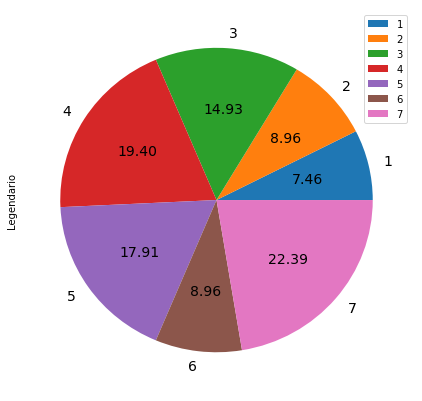

#### Ejercicio 2
Para este ejercicio se usará la encuesta CASEN 2017. Si bien utilizaremos la versión de menor tamaño, pruebe en su casa si mediante la siguiente función puede cargar la versión completa.

In [3]:
import pandas as pd
def casen(fname):
    import sys

    reader = pd.read_stata(fname, convert_categoricals=False, iterator=True)
    df = pd.DataFrame()

    try:
        chunk = reader.get_chunk(100*1000)
        while len(chunk) > 0:
            df = df.append(chunk, ignore_index=True)
            chunk = reader.get_chunk(100*1000)
            print('.'),
            sys.stdout.flush()
    except (StopIteration, KeyboardInterrupt):
        pass

    return(df)
#Probar si funciona para cargar archivos grandes.

Importa las variables id_vivienda, y1, y7, region, comuna, edad y pobreza. Verifique cuánto tiempo tarda en hacer esta acción.

Wall time: 4.62 s


Vea como se correlacionan nuestra variables y posteriormente cree un gráfico de barras horizontales que compare el retiro de dinero del negocio para gastos personales promedio por región.

,region,comuna,y1,y7,edad,pobreza
region,1.000000,0.999378,0.059258,0.036527,0.018975,-0.001665
comuna,0.999378,1.000000,0.056612,0.035573,0.019749,-0.001917
y1,0.059258,0.056612,1.000000,NaN,0.065961,0.099186
y7,0.036527,0.035573,NaN,1.000000,0.014472,0.094384
edad,0.018975,0.019749,0.065961,0.014472,1.000000,0.108122
pobreza,-0.001665,-0.001917,0.099186,0.094384,0.108122,1.000000


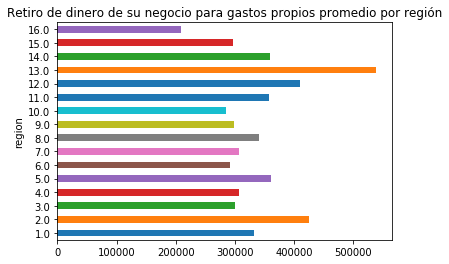

<h2>Ejercicios Propuestos</h2>

### Ejercicio 1: Regex
Similar a como hicimos anteriormente, ahora genere una expresión que permita encontrar las IDs de los emails dentro del siguiente texto.

In [37]:
import re
import pandas as pd
texto = '''
Juan: juanarias@gmail.com
El e-mail de Pedro es pedro007@yahoo.com
pagonzalez20@uc.cl es el email de pablo
nicolas@gmail.com es el email de nicolás
'''

['juanarias', 'pedro007', 'pagonzalez20', 'nicolas']


### Ejercicio 2: Pandas
Genere un gráfico de barras horizontales mostrando los puntos de ataque de los 5 pokemon legendarios con mayor defensa.

<hr style="color=orange; border-color:red; height:2px; background:orange" />
<h2 style="text-align:center; font-weight:bold;">¿Dudas? ¿Preguntas sobre la tarea?</h2>